## Part 1: Data scraping and preparation

### Step 1: Scrape your competitor's data 

In [1]:
!pip install fake_useragent

In [13]:
pip install lxml

     |████████████████████████████████| 5.4 MB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from datetime import datetime
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
from fake_useragent import UserAgent
ua = UserAgent()
print(ua.chrome)
header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'}
print(header)
url='https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
response = requests.get(url, headers=header)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1664.3 Safari/537.36
{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'}


In [30]:
response.status_code

200

In [31]:
##Extract the text from the page
text=response.text

In [32]:
##BeautifulSoup to read and parse the data
root = BeautifulSoup(text,'lxml')

In [33]:
##view the content 
print(root.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 50 sol

In [34]:
## find the appropriate table and save it
htmltable = root.find('table', { 'class' : 'table table-striped table-responsive-md' })

In [35]:
##read table
cmptt_table = pd.read_html(str(htmltable))[0]
cmptt_table.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
cmptt_table.tail()

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
45,46,X2.7,2015/05/05,2339,22:05,22:11,22:15,MovieView archive
46,47,X2.7,2003/11/03,488,01:09,01:30,01:45,MovieView archive
47,48,X2.7,1998/05/06,8210,07:58,08:09,08:20,MovieView archive
48,49,X2.6,2005/01/15,720,22:25,23:02,23:31,MovieView archive
49,50,X2.6,2001/09/24,9632,09:32,10:38,11:09,MovieView archive


### Step 2: Tidy the top 50 solar flare data

In [36]:
# Drop the last column
cmptt_table = cmptt_table.drop('movie', 1)

In [37]:
cmptt_table

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39


In [38]:
##combine the date and each of the three time columns into three datetime columns.
for i, row in cmptt_table.iterrows():
  for col in ['start_time', 'maximum_time', 'end_time']:
    cmptt_table.at[i, col] =  datetime.strptime(row['date'] + ' ' + row[col], '%Y/%m/%d %H:%M')
    # cmptt_table.set_value(i, col, datetime.strptime(row['date'] + ' ' + row[col], '%Y/%m/%d %H:%M'))
cmptt_table.head(10)


,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003/10/29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006/12/05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003/11/02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [40]:
##Set regions coded as - as missing (NaN)
cmptt_table['region'] = cmptt_table['region'].replace('-', None)
cmptt_table.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [41]:
cmptt_table.columns = ['rank', 'x_class' , 'date', 'region', 'start_datetime' , 'max_datetime' , 'end_datetime']

In [42]:
cmptt_table = cmptt_table[['rank', 'x_class' ,   'start_datetime' , 'max_datetime' , 'end_datetime', 'region']]

In [43]:
cmptt_table.tail()

,rank,x_class,start_datetime,max_datetime,end_datetime,region
45,46,X2.7,2015-05-05 22:05:00,2015-05-05 22:11:00,2015-05-05 22:15:00,2339
46,47,X2.7,2003-11-03 01:09:00,2003-11-03 01:30:00,2003-11-03 01:45:00,488
47,48,X2.7,1998-05-06 07:58:00,1998-05-06 08:09:00,1998-05-06 08:20:00,8210
48,49,X2.6,2005-01-15 22:25:00,2005-01-15 23:02:00,2005-01-15 23:31:00,720
49,50,X2.6,2001-09-24 09:32:00,2001-09-24 10:38:00,2001-09-24 11:09:00,9632


### Step 3: Scrape the NASA data 

In [45]:
nasa_link = 'http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html'
req = requests.get(nasa_link) 
html = req.text
soup = BeautifulSoup(html, 'html.parser')


In [46]:
content = soup.find('pre').text
lines = content.splitlines()
lines = [l for l in lines if ((len(l) > 0) and (l[0].isdigit()))]
lines = [l.split('PHTX')[0] for l in lines]
nasa_table = pd.DataFrame([[i for i in lines[k].split(" ") if i != ""] for k in range(len(lines))])
nasa_table.columns = ['start_date' ,'start_time' ,'end_date' ,'end_time', 'start_frequency', 'end_frequency',
                      'flare_location', 'flare_region',
                      'flare_classification' , 'cme_date' , 'cme_time' , 'cme_angle' , 'cme_width' , 'cme_speed' ]

nasa_table.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


### Step 4: Tidy the NASA the table

In [47]:
nasa_table = nasa_table.replace('????', np.nan)
nasa_table['is_halo'] = nasa_table['cme_angle'].apply(lambda x: True if x == 'Halo' else False)
nasa_table = nasa_table.replace('Halo', np.nan)
nasa_table = nasa_table.replace('-----', np.nan)
nasa_table = nasa_table.replace('----', np.nan)		
nasa_table = nasa_table.replace('--/--', np.nan)
nasa_table = nasa_table.replace('--:--', np.nan)
nasa_table = nasa_table.replace('---', np.nan)

nasa_table = nasa_table.replace('LASCO DATA GAP', np.nan) 
nasa_table['width_lower_bound'] = nasa_table['cme_width'].apply(lambda x: True if str(x).startswith('>') else False)
nasa_table['flare_location'] = nasa_table['flare_location'].apply(lambda x: x if len(re.findall('[0-9]+' , str(x))) > 0 else np.nan)
nasa_table.head()


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False


In [48]:
# rank x_class  start_datetime  max_datetime  end_datetime region
for i, row in nasa_table.iterrows():
  for d, m in zip(['start_date',		'end_date'],	['start_time','end_time']):
    if len(row[d].split('/')) < 3:
      row[d] = row[0].split('/')[0] +'/' + row[d]
    if row[m].split(':')[0] == '24':
      # print(1)
      row[m] = '00' + ":" + row[m].split(':')[1]

    nasa_table.loc[i, d] = datetime.strptime(row[d] + ' ' + row[m], '%Y/%m/%d %H:%M')
    # cmptt_table.at[i, col] =  datetime.strptime(row['date'] + ' ' + row[col], '%Y/%m/%d %H:%M')
    # # cmptt_table.set_value(i, col, datetime.strptime(row['date'] + ' ' + row[col], '%Y/%m/%d %H:%M'))
nasa_table['plot'] = 'PHTX'
nasa_table.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,plot
0,1997-04-01 14:00:00,14:00,1997-04-01 14:15:00,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False,PHTX
1,1997-04-07 14:30:00,14:30,1997-04-07 17:30:00,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,True,False,PHTX
2,1997-05-12 05:15:00,05:15,1997-05-14 16:00:00,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,True,False,PHTX
3,1997-05-21 20:20:00,20:20,1997-05-21 22:00:00,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False,PHTX
4,1997-09-23 21:53:00,21:53,1997-09-23 22:16:00,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False,PHTX


In [49]:
del nasa_table['start_time']
del nasa_table['end_time']
nasa_table.head()

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,plot
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False,PHTX
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,True,False,PHTX
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,True,False,PHTX
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False,PHTX
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False,PHTX



## Part 2: Analysis

### Question 1: Replication

In [50]:
nasa_table['flare_classification'].unique()

array(['M1.3', 'C6.8', 'C1.3', 'C1.4', 'C8.6', 'M4.2', 'X2.1', 'X9.4',
       'X2.6', 'B9.4', 'C1.1', nan, 'M1.4', 'X1.2', 'C8.9', 'X1.0',
       'M6.8', 'X1.1', 'X2.7', 'M7.7', 'B6.6', 'B7.9', 'C7.5', 'M1.0',
       'C2.9', 'C4.4', 'M8.4', 'C1.0', 'C5.9', 'M8.0', 'M4.4', 'M3.9',
       'C8.8', 'M1.7', 'C3.5', 'M1.6', 'C7.6', 'C2.1', 'X1.8', 'M3.8',
       'M1.8', 'C4.7', 'C7.3', 'M6.5', 'M1.2', 'C2.3', 'C9.7', 'M3.1',
       'FILA', 'M1.5', 'C7.8', 'M7.6', 'X2.3', 'M5.2', 'M3.5', 'M3.0',
       'M1.9', 'M5.7', 'X5.7', 'M3.7', 'M5.9', 'M5.1', 'M2.5', 'C4.0',
       'C3.2', 'M7.4', 'C5.4', 'C7.9', 'X2.0', 'M8.2', 'X1.9', 'X4.0',
       'C1.6', 'C6.5', 'M6.7', 'C5.6', 'X1.7', 'X20.', 'X5.6', 'M7.9',
       'M2.3', 'X14.', 'C2.2', 'M6.3', 'X5.3', 'C9.5', 'M9.1', 'X1.6',
       'X1.3', 'M2.8', 'M9.9', 'M7.1', 'X3.4', 'M5.0', 'M2.2', 'C3.1',
       'C9.6', 'M2.6', 'X1.5', 'C4.5', 'C3.7', 'M8.5', 'C3.3', 'X3.3',
       'X4.8', 'M8.7', 'M2.4', 'X3.1', 'C5.2', 'M2.9', 'M4.6', 'M2.7',
       'M

In [51]:
X_class = nasa_table.loc[nasa_table['flare_classification'].isin([i for i in nasa_table['flare_classification'] if str(i).startswith('X')])]

In [52]:
X_class['num'] = X_class['flare_classification'].apply(lambda x: float(x[1:]))

<ipython-input-52-1b89278d6c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_class['num'] = X_class['flare_classification'].apply(lambda x: float(x[1:]))


In [56]:
top_50 = X_class.sort_values('num', ascending=False).head(50)
top_50

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,plot,num
242,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,11/04,19:54,NaN,360,2657,True,False,PHTX,28.0
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,04/02,22:06,261,244,2505,False,False,PHTX,20.0
234,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,10/28,11:30,NaN,360,2459,True,False,PHTX,17.0
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,04/15,14:06,245,167,1199,False,False,PHTX,14.0
235,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,10/29,20:54,NaN,360,2029,True,False,PHTX,10.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,11/06,12:10,NaN,360,1556,True,False,PHTX,9.4
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,NaN,False,False,PHTX,9.0
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,11/02,17:30,NaN,360,2598,True,False,PHTX,8.3
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,01/20,06:54,NaN,360,882,True,False,PHTX,7.1
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,08/09,08:12,NaN,360,1610,True,False,PHTX,6.9


In [57]:
cmptt_table

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


It replicate pretty well. It gets most of them correct. 

### Question 2: Integration

In [58]:
def match_score(row):
  region = row['region']
  same_region = nasa_table.loc[nasa_table['flare_region'].isin([i for i in nasa_table['flare_region'] if str(i).endswith(str(region))])]
  time = row['start_datetime']
  same_region['diff'] = same_region['start_date'].apply(lambda x: abs(x - time))
  matched = same_region.sort_values('diff').head(1)
  if matched.shape[0] == 1:
    return matched
  else:
    same_region = nasa_table.copy()
    same_region['diff'] = same_region['start_date'].apply(lambda x: abs(x - time))
    matched = same_region.sort_values('diff').head(1)
    if matched.shape[0] == 1:
      return matched
    else:
      print('Nothing')


In [59]:
matched_df = pd.DataFrame()
for i, row in cmptt_table.iterrows():
  tmp = match_score(row)
  matched_df = pd.concat([matched_df, tmp])


<ipython-input-58-61c03ee369ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_region['diff'] = same_region['start_date'].apply(lambda x: abs(x - time))


In [60]:
matched_df.tail()

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,plot,diff
481,2014-12-21 12:05:00,2014-12-21 12:28:00,14000,7400,S14W25,12241,M1.0,12/21,12:12,NaN,360,669,True,False,PHTX,135 days 10:00:00
239,2003-11-03 01:15:00,2003-11-03 01:25:00,3000,1500,N10W83,10488,X2.7,11/03,01:59,304,65,827,False,False,PHTX,0 days 00:06:00
19,1998-05-06 08:25:00,1998-05-06 08:35:00,14000,5000,S11W65,8210,X2.7,05/06,08:29,309,190,1099,False,False,PHTX,0 days 00:27:00
286,2005-01-15 23:00:00,2005-01-15 00:00:00,3000,40,N15W05,10720,X2.6,01/15,23:06,NaN,360,2861,True,False,PHTX,0 days 00:35:00
144,2001-09-24 10:45:00,2001-09-25 20:00:00,7000,30,S16E23,9632,X2.6,09/24,10:30,NaN,360,2402,True,False,PHTX,0 days 01:13:00


In [61]:
nasa_table['rank'] = np.nan
k = 1
for i, row in matched_df.iterrows():
  nasa_table.loc[i, 'rank'] = k
  k = k + 1

In [62]:
nasa_table.loc[i, :]

start_date              2001-09-24 10:45:00
end_date                2001-09-25 20:00:00
start_frequency                        7000
end_frequency                            30
flare_location                       S16E23
flare_region                           9632
flare_classification                   X2.6
cme_date                              09/24
cme_time                              10:30
cme_angle                               NaN
cme_width                               360
cme_speed                              2402
is_halo                                True
width_lower_bound                     False
plot                                   PHTX
rank                                     50
Name: 144, dtype: object

We first match the X_class and them the region. And then match the event that has the closest starting time.

### Question 3: Analysis

Text(0.5, 1.0, 'Speed and Width over Time')

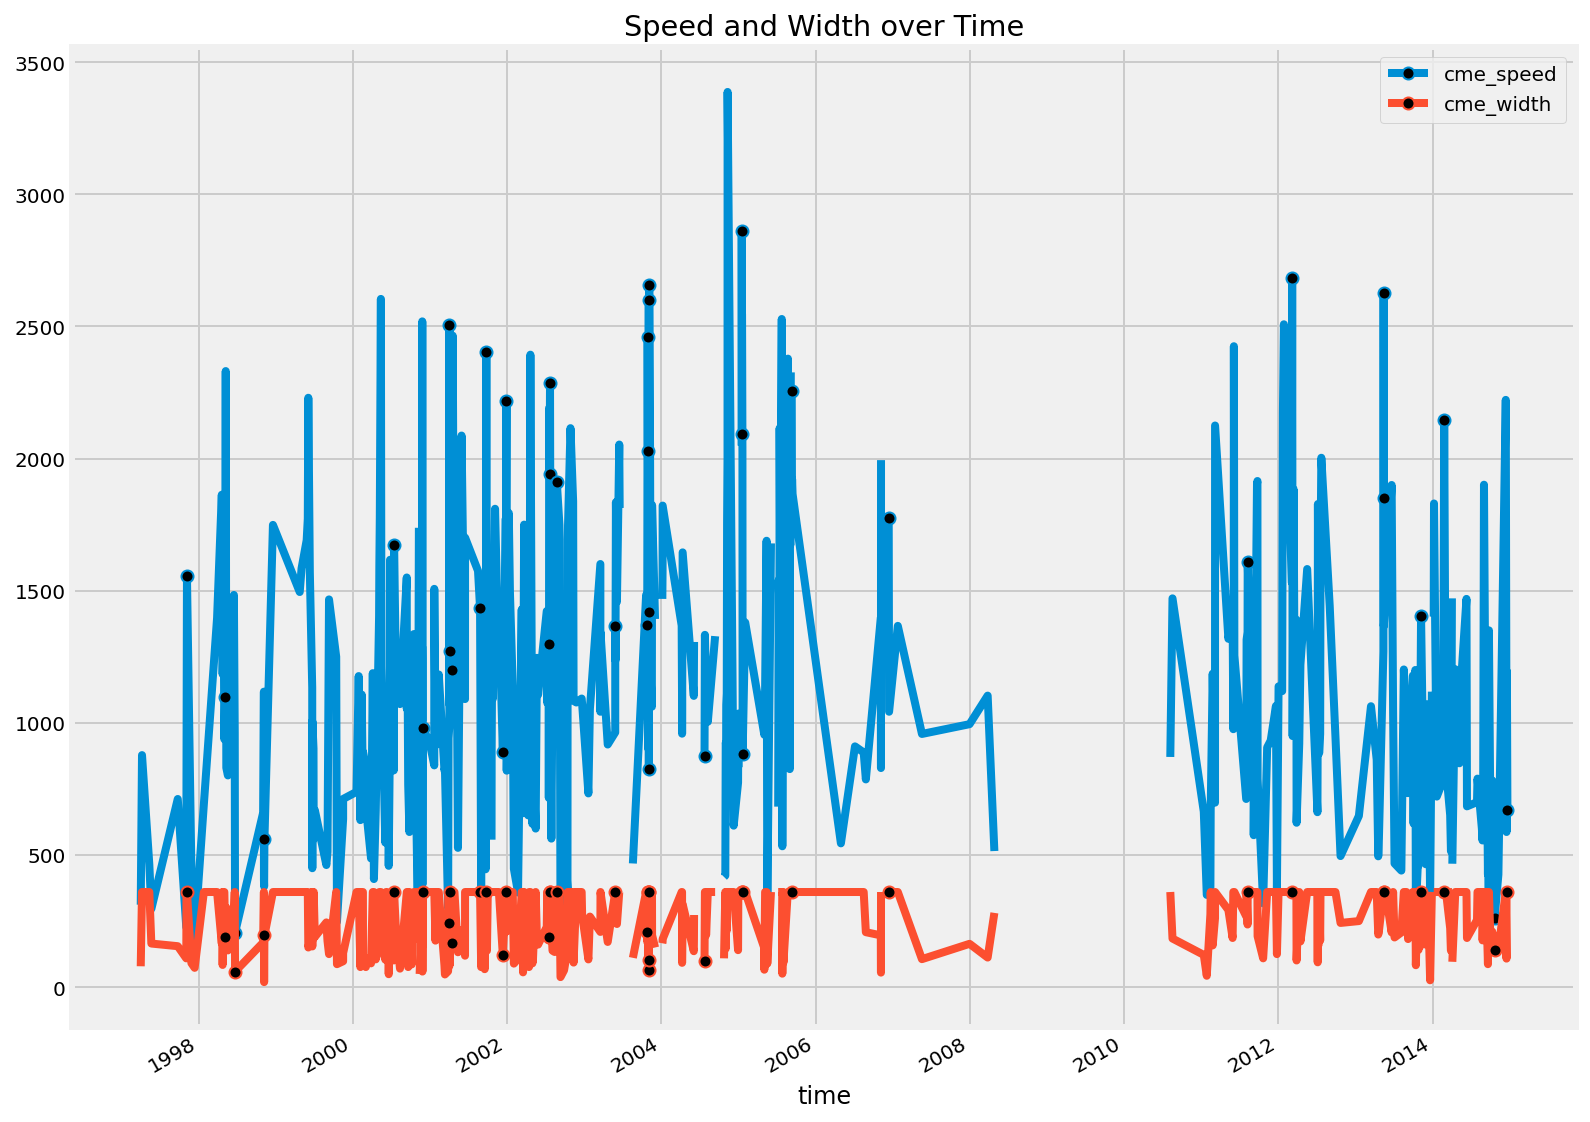

In [65]:
plot_df = nasa_table[['cme_width',	'cme_speed', 'rank']].copy()
plot_df.index = nasa_table.start_date
plot_df['cme_speed'] = [float(str(i)) for  i in plot_df['cme_speed']]
plot_df['cme_width'] = [float(str(i).replace('>', '').replace('h', '')) for  i in plot_df['cme_width']]
marks = list(np.where(plot_df['rank'].isna() == False)[0])

plot_df[['cme_speed', 'cme_width']].plot(figsize = (12, 10), linestyle='-', markevery= marks, marker='o', markerfacecolor='black')
plt.xlabel('time')
plt.title('Speed and Width over Time')

I choose to plot the first one:  Plot attributes in the NASA dataset (speed and width) over time.